In [151]:
pip install pandas matplotlib torch scikit-learn seaborn numpy tabulate


In [152]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
df = pd.read_csv('electricity_bill.csv')

df.describe().T

# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Rows in train dataset: ", df.shape[0])
print("Rows in test dataset: ", df.shape[0])
print("Columns in dataset: ", df.shape[1])
print("Unique values in dataset:\n", df.nunique())

Rows in train dataset:  1250
Rows in test dataset:  1250
Columns in dataset:  16
Unique values in dataset:
 Building_Type                     4
Construction_Year                54
Number_of_Floors                 13
Energy_Consumption_Per_SqM      624
Water_Usage_Per_Building        710
Waste_Recycled_Percentage      1250
Occupancy_Rate                 1250
Indoor_Air_Quality             1080
Smart_Devices_Count              19
Green_Certified                   2
Maintenance_Resolution_Time    1247
Building_Status                   3
Maintenance_Priority              3
Energy_Per_SqM                 1229
Number_of_Residents             460
Electricity_Bill               1244
dtype: int64


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   object 
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   object 
 12  Maintenance_Priority         1250 non-null   object 
 13  Energy_Per_SqM    

In [155]:
df.describe().T

count          mean          std          min  \
Construction_Year            1250.0   1996.735200    15.696515  1970.000000   
Number_of_Floors             1250.0      7.118400     3.773456     1.000000   
Energy_Consumption_Per_SqM   1250.0    108.745712    72.180593    50.000000   
Water_Usage_Per_Building     1250.0    647.021156   485.194992   200.000000   
Waste_Recycled_Percentage    1250.0     28.831580    16.250126     0.908321   
Occupancy_Rate               1250.0     77.285182    15.093523    17.600798   
Indoor_Air_Quality           1250.0     40.517956    33.705393     0.034526   
Smart_Devices_Count          1250.0      5.244000     3.248524     1.000000   
Green_Certified              1250.0      0.237600     0.425783     0.000000   
Maintenance_Resolution_Time  1250.0      9.617933     6.874172     5.000417   
Energy_Per_SqM               1250.0    152.156367    48.567837    50.000000   
Number_of_Residents          1250.0    251.764800   144.082406     1.000000   
Electricity_Bill             1250.0  15089.459765  4974.536190  2000.000000   

                                      25%           50%           75%  \
Construction_Year             1983.000000   1996.000000   2010.000000   
Number_of_Floors                 4.000000      7.000000     11.000000   
Energy_Consumption_Per_SqM      50.000000     72.868797    154.658612   
Water_Usage_Per_Building       200.000000    451.638391   1013.701569   
Waste_Recycled_Percentage       15.948639     26.828853     39.807403   
Occupancy_Rate                  68.047227     80.355416     88.977348   
Indoor_Air_Quality              11.661954     29.959019     66.641693   
Smart_Devices_Count              3.000000      5.000000      7.000000   
Green_Certified                  0.000000      0.000000      0.000000   
Maintenance_Resolution_Time      5.942027      7.607172     10.514598   
Energy_Per_SqM                 118.117412    152.234583    183.061704   
Number_of_Residents            127.250000    261.000000    375.750000   
Electricity_Bill             11690.482925  15148.928890  18471.215980   

                                      max  
Construction_Year             2023.000000  
Number_of_Floors                13.000000  
Energy_Consumption_Per_SqM     250.000000  
Water_Usage_Per_Building      1500.000000  
Waste_Recycled_Percentage       80.886835  
Occupancy_Rate                  99.923707  
Indoor_Air_Quality             100.000000  
Smart_Devices_Count             20.000000  
Green_Certified                  1.000000  
Maintenance_Resolution_Time     72.000000  
Energy_Per_SqM                 300.000000  
Number_of_Residents            498.000000  
Electricity_Bill             33887.449880

# a)

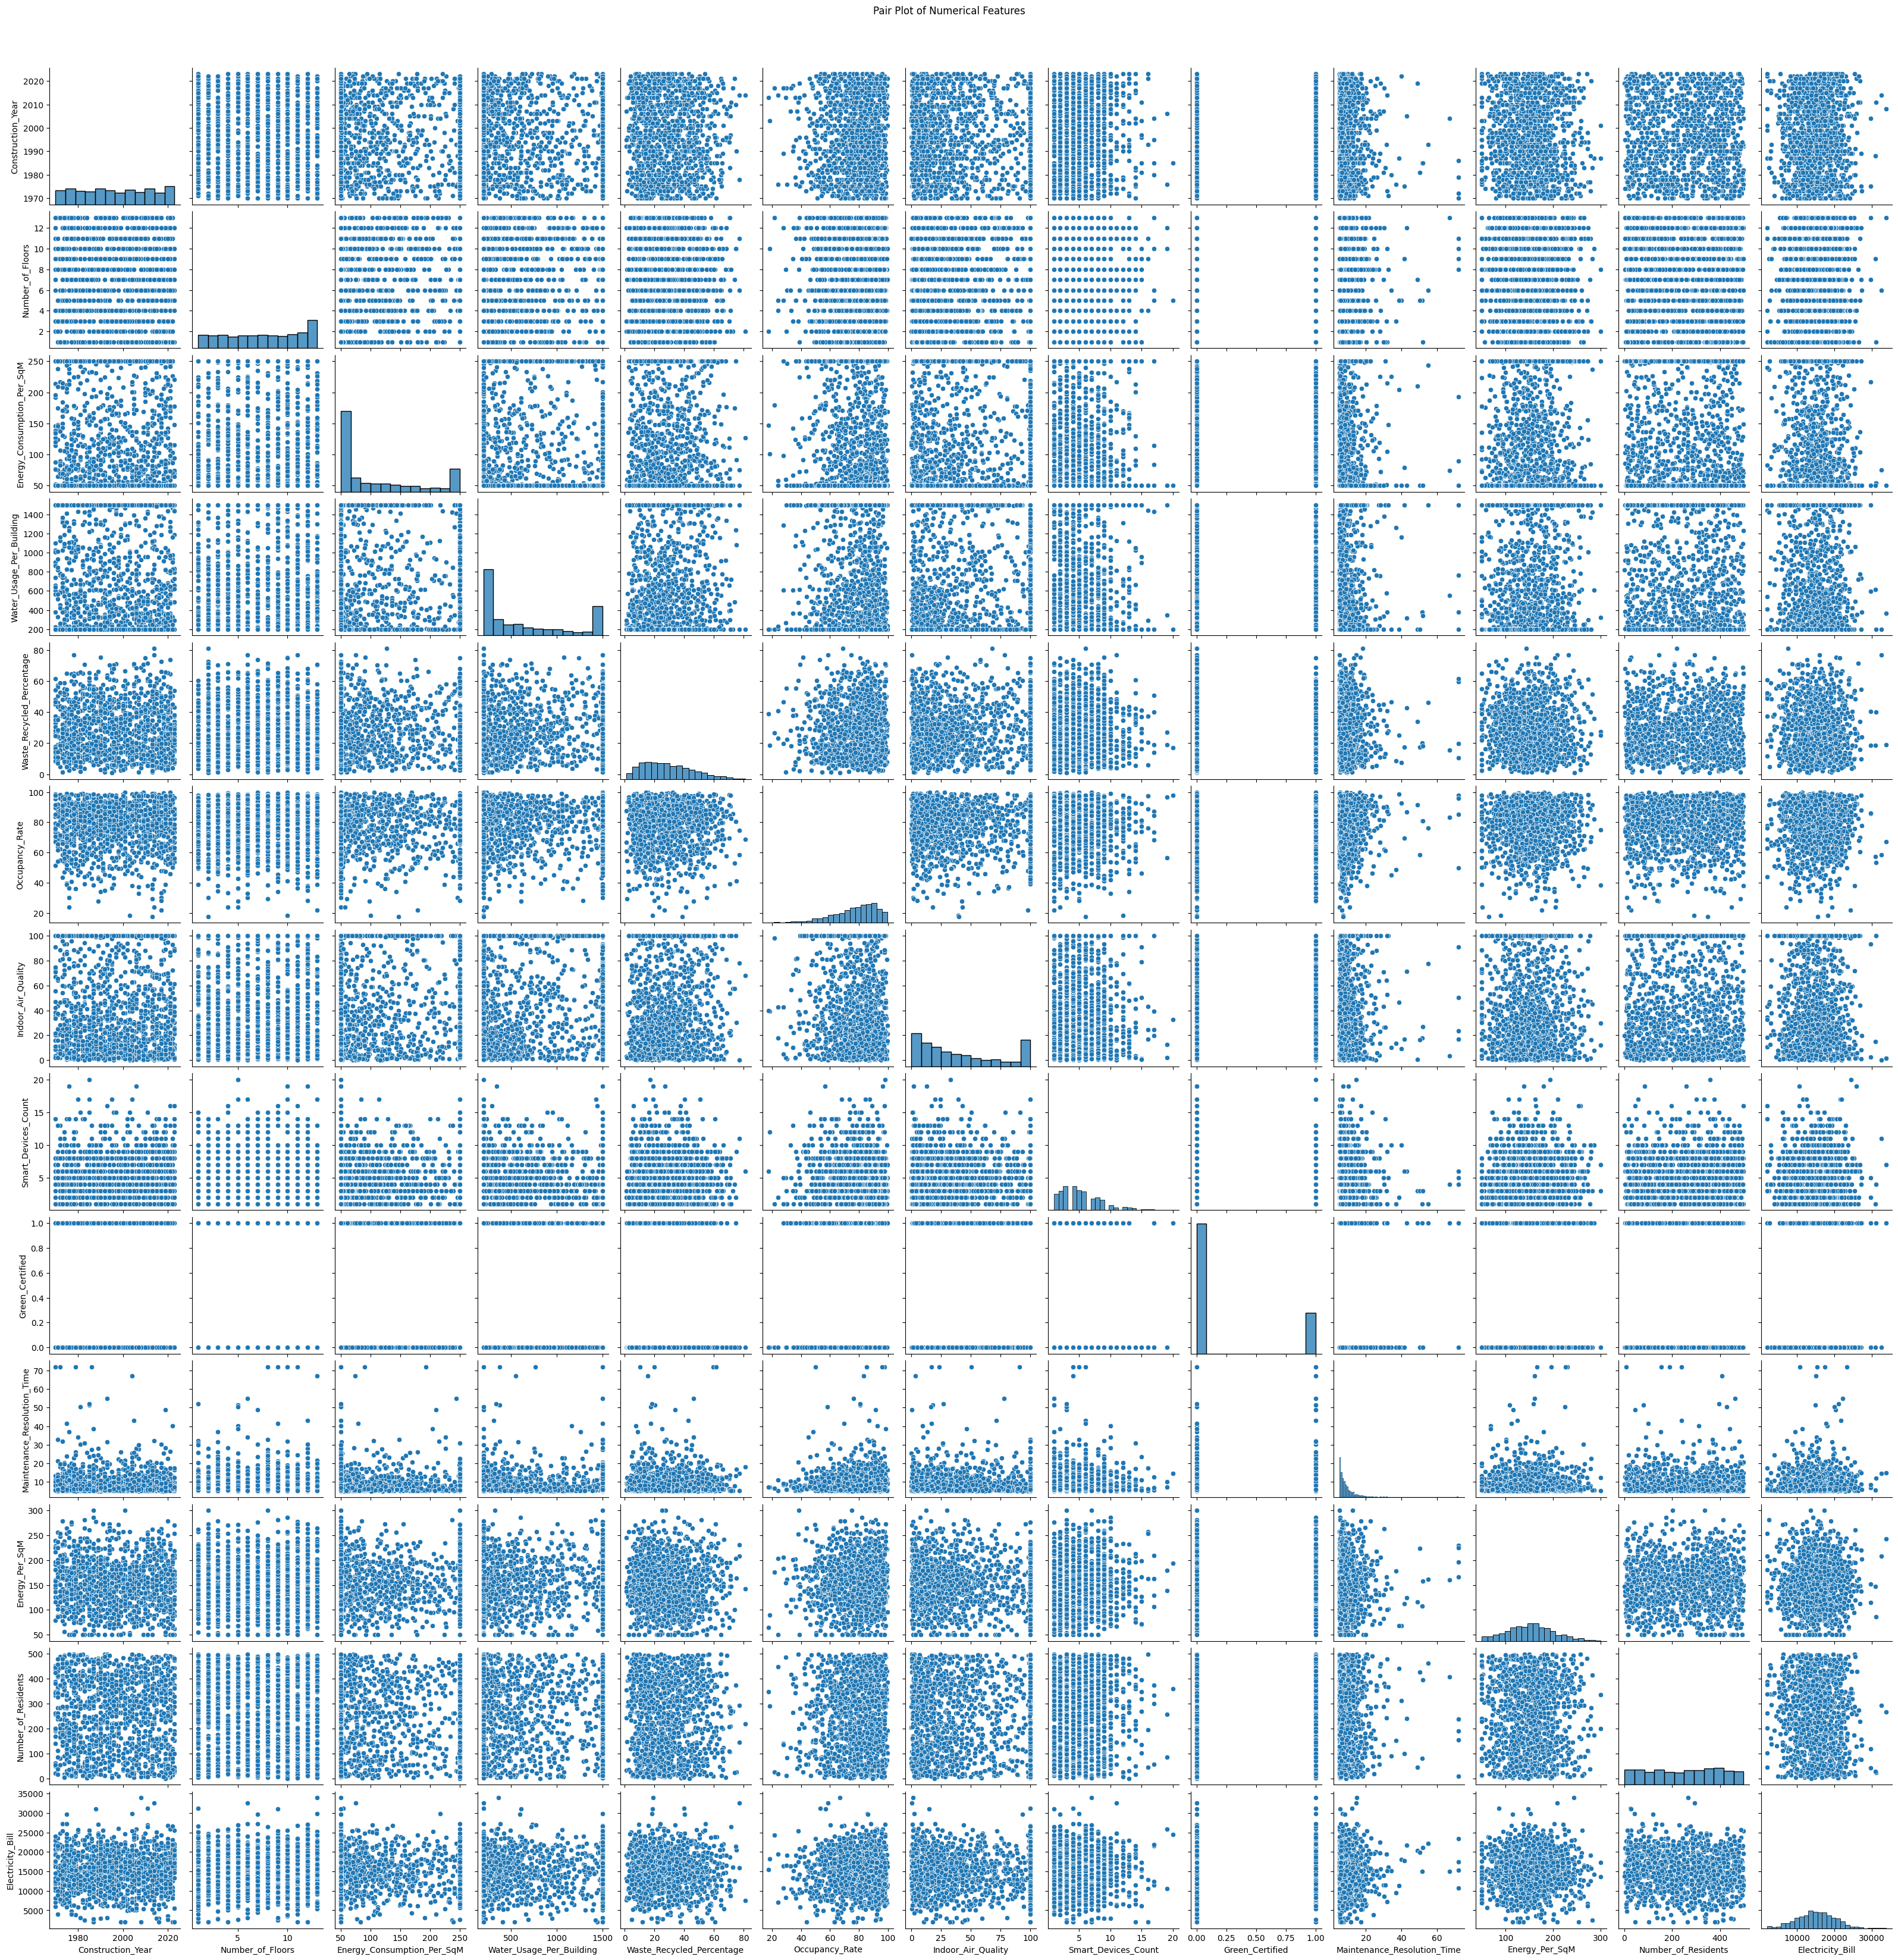

In [156]:
# Pair plot (only for numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns.drop(columns='Green_Certified')
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


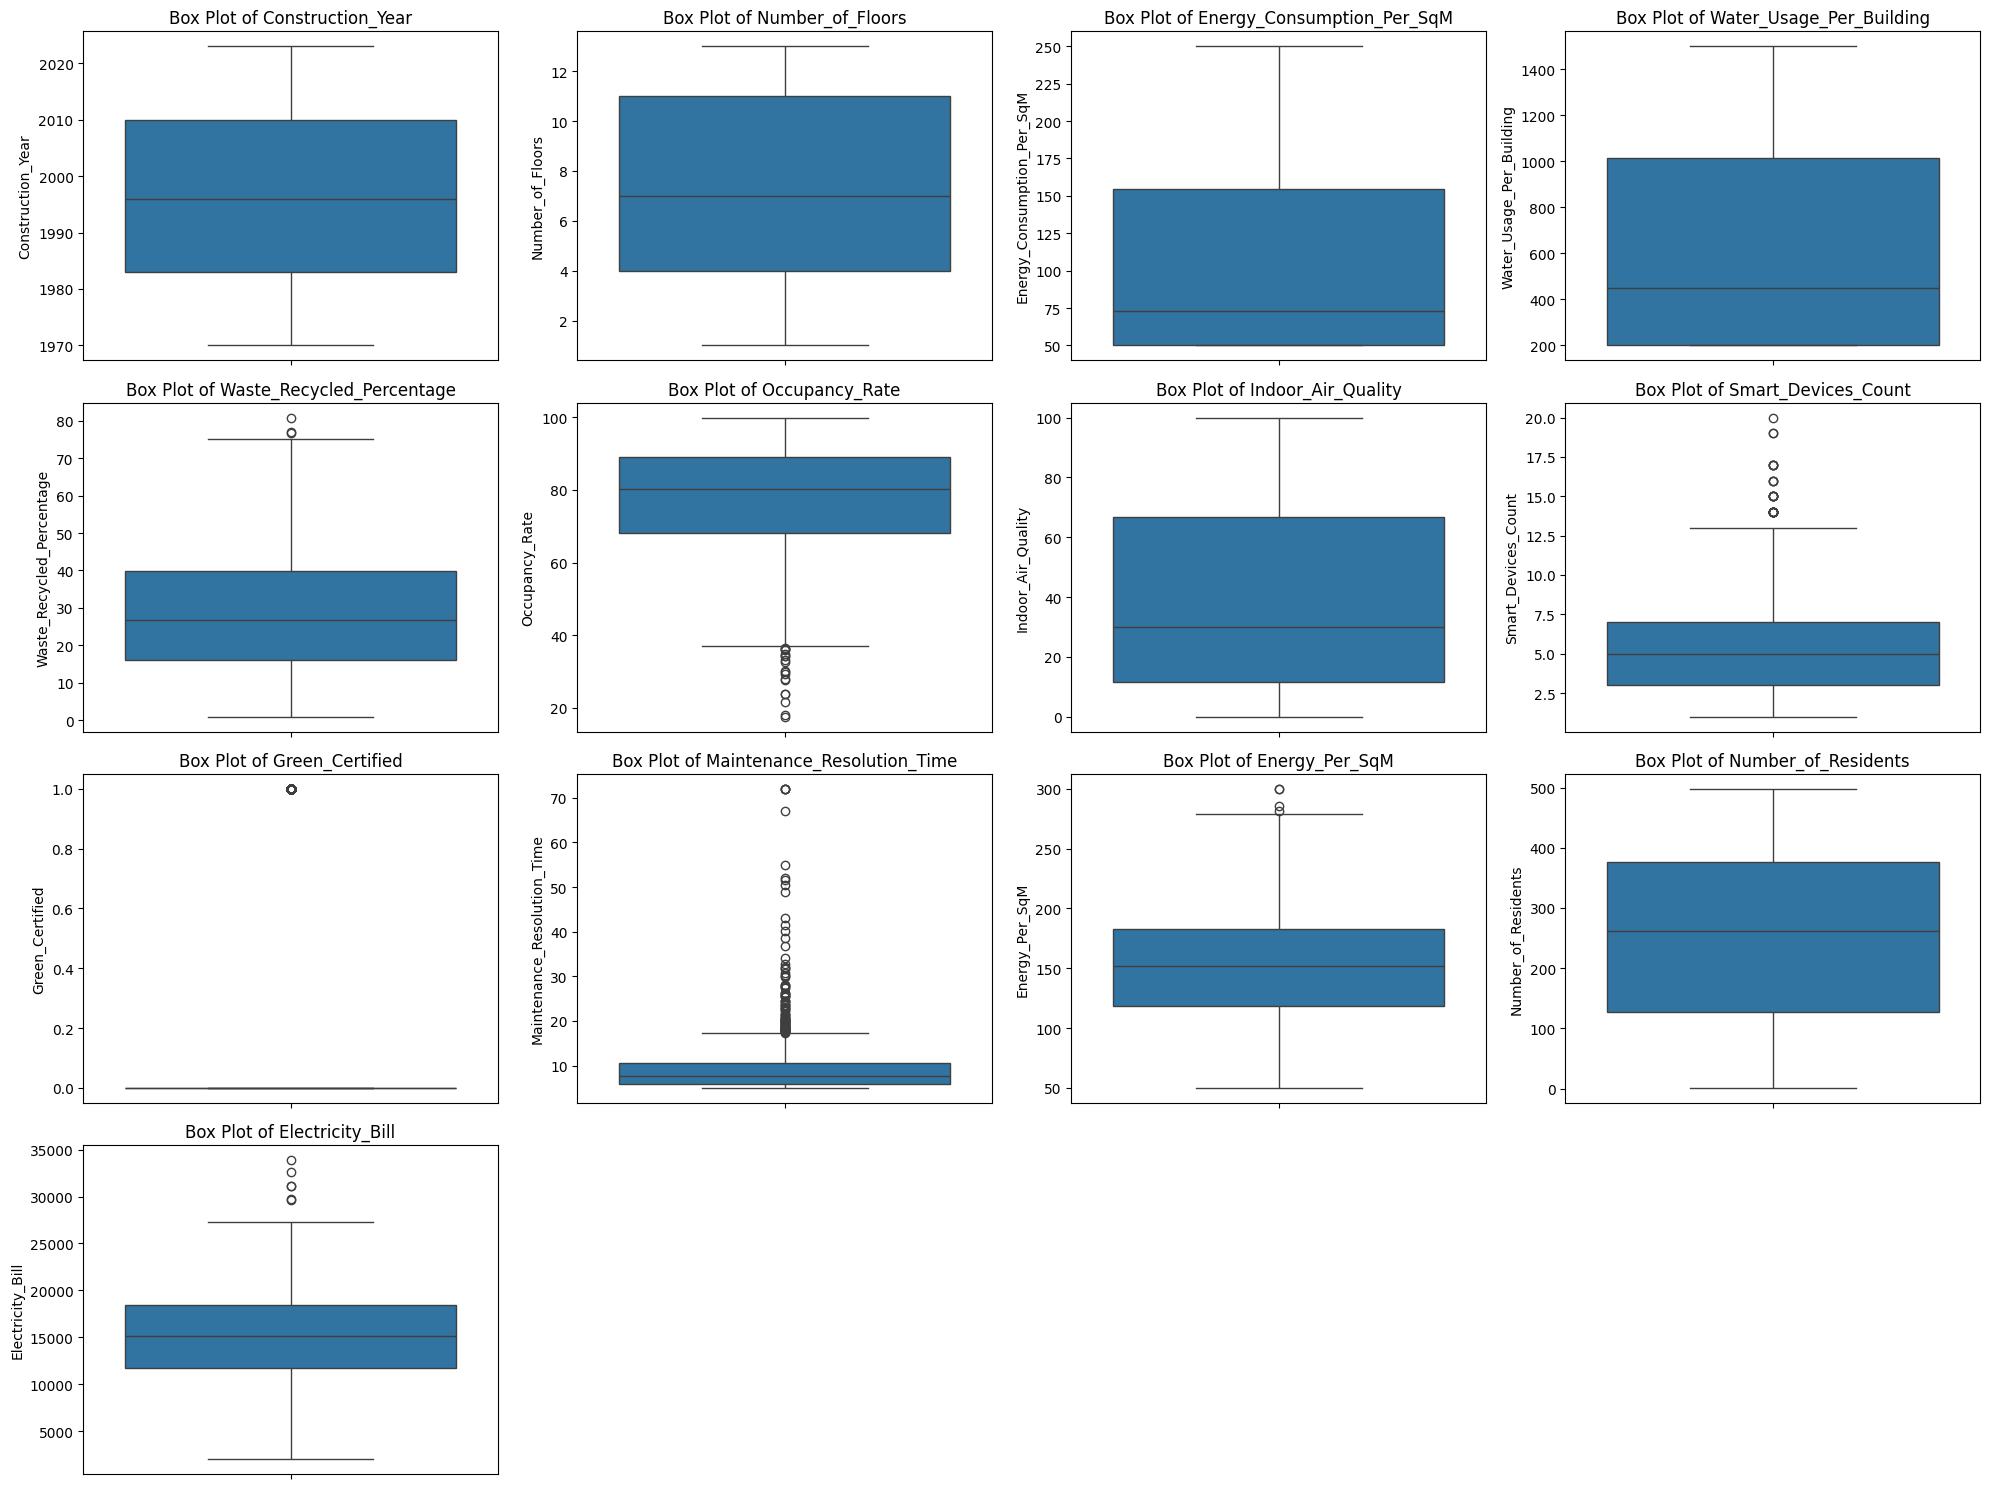

In [157]:
# Box plots in a single figure
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# # Box plots
# for i, column in enumerate(numeric_columns, 1):
#     plt.figure(figsize=(6,4))
#     sns.boxplot(y=column, data=df)
#     plt.title(f'Box Plot of {column}')
#     plt.show()

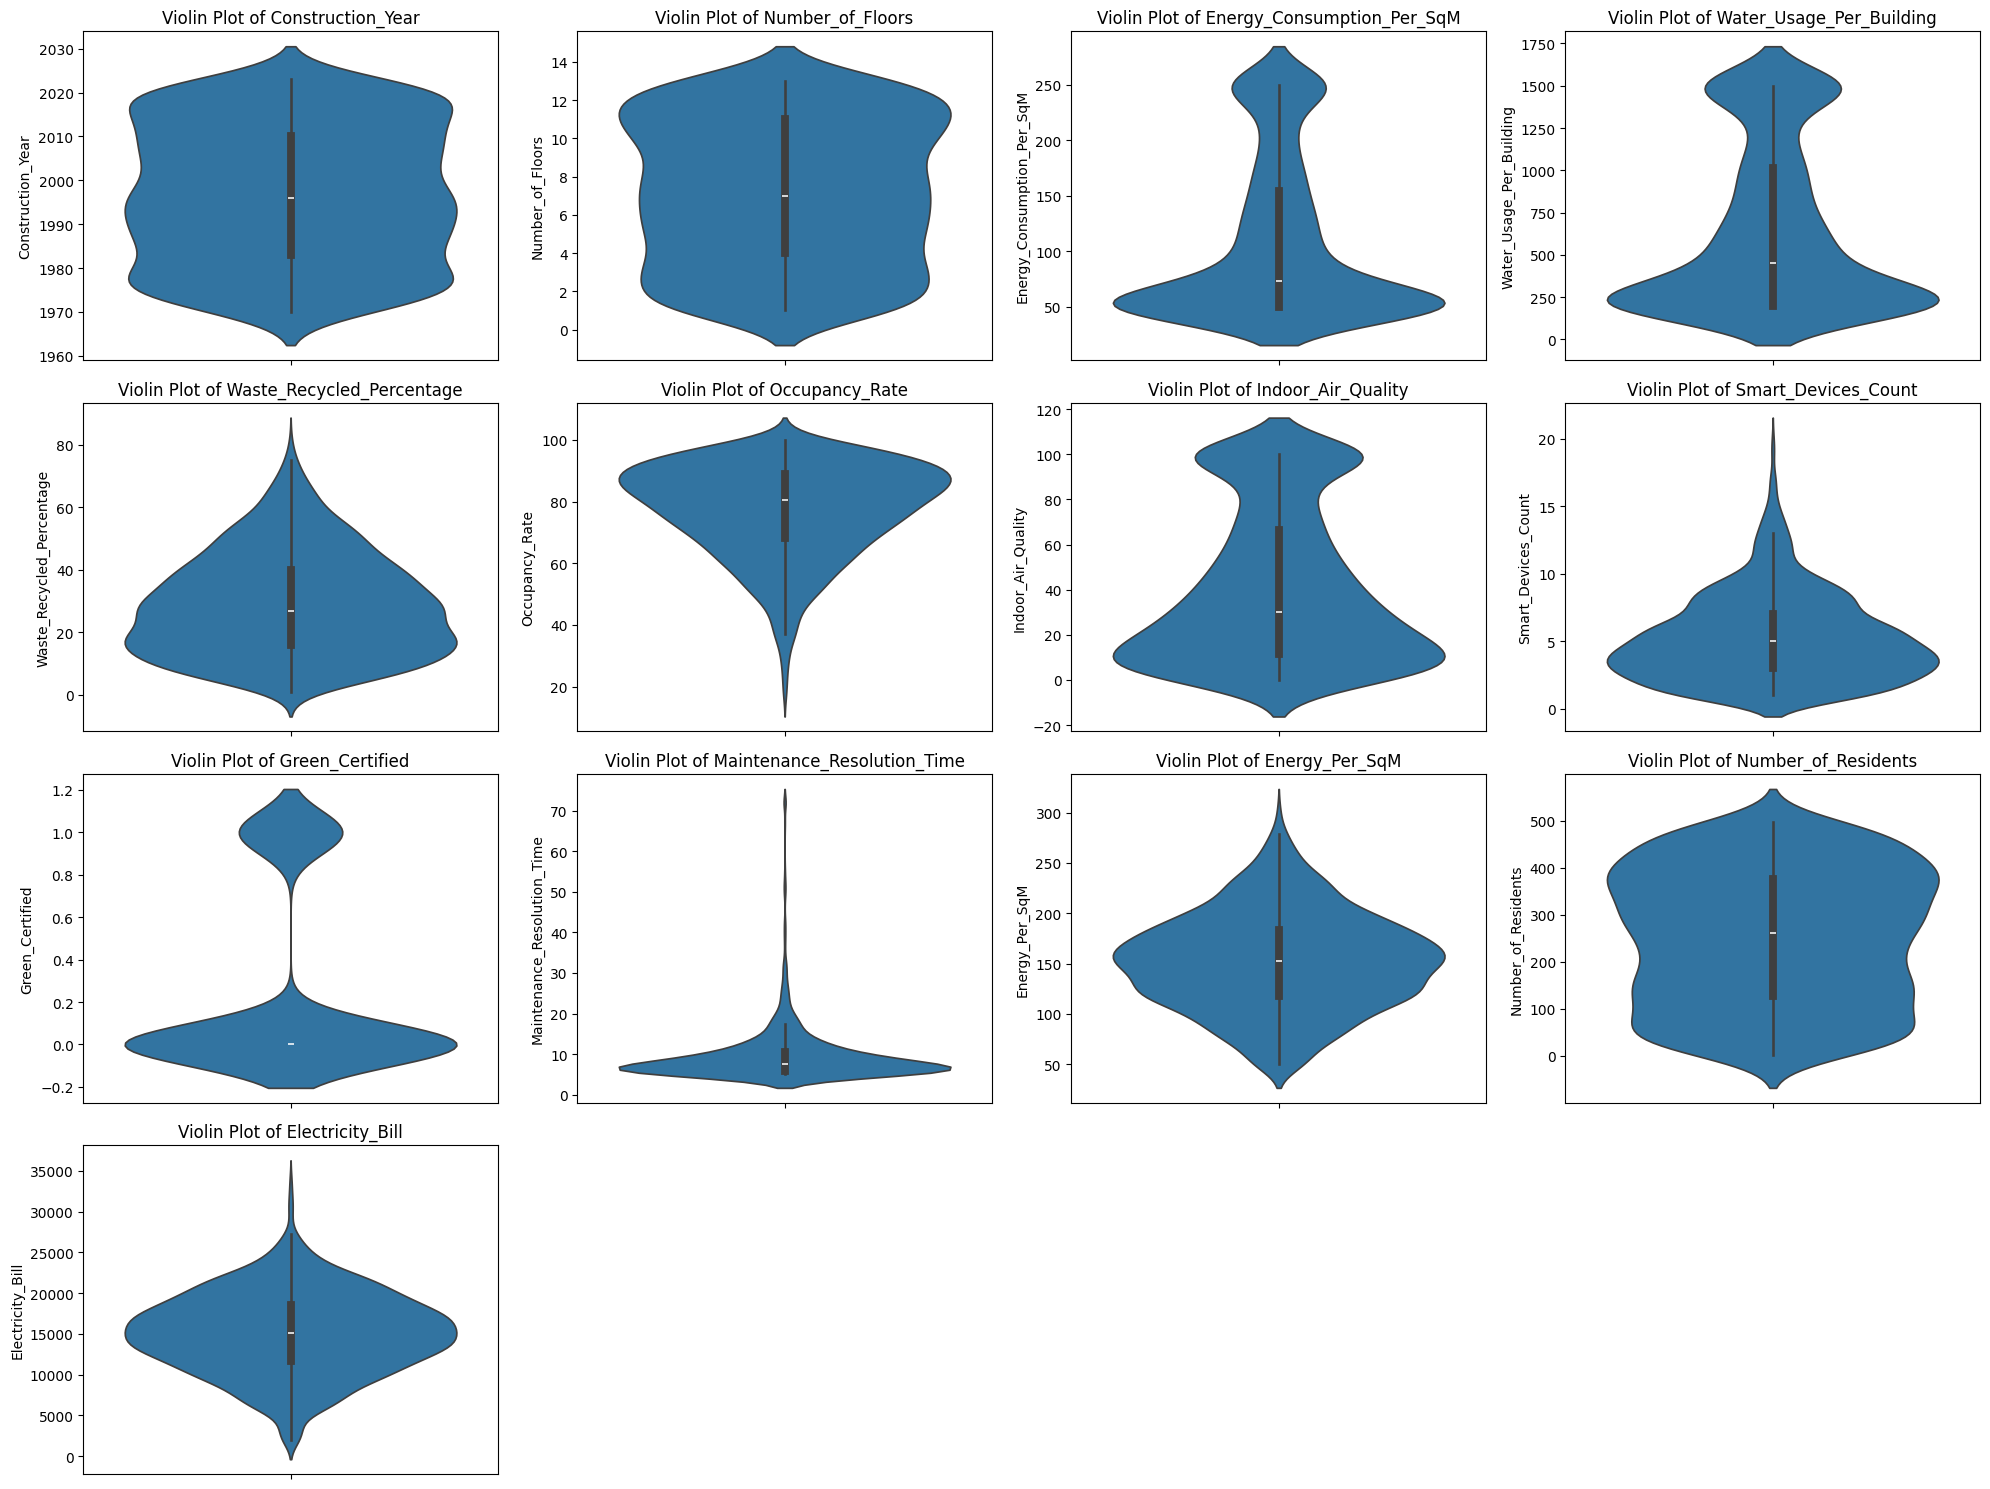

In [158]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(y=column, data=df)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()


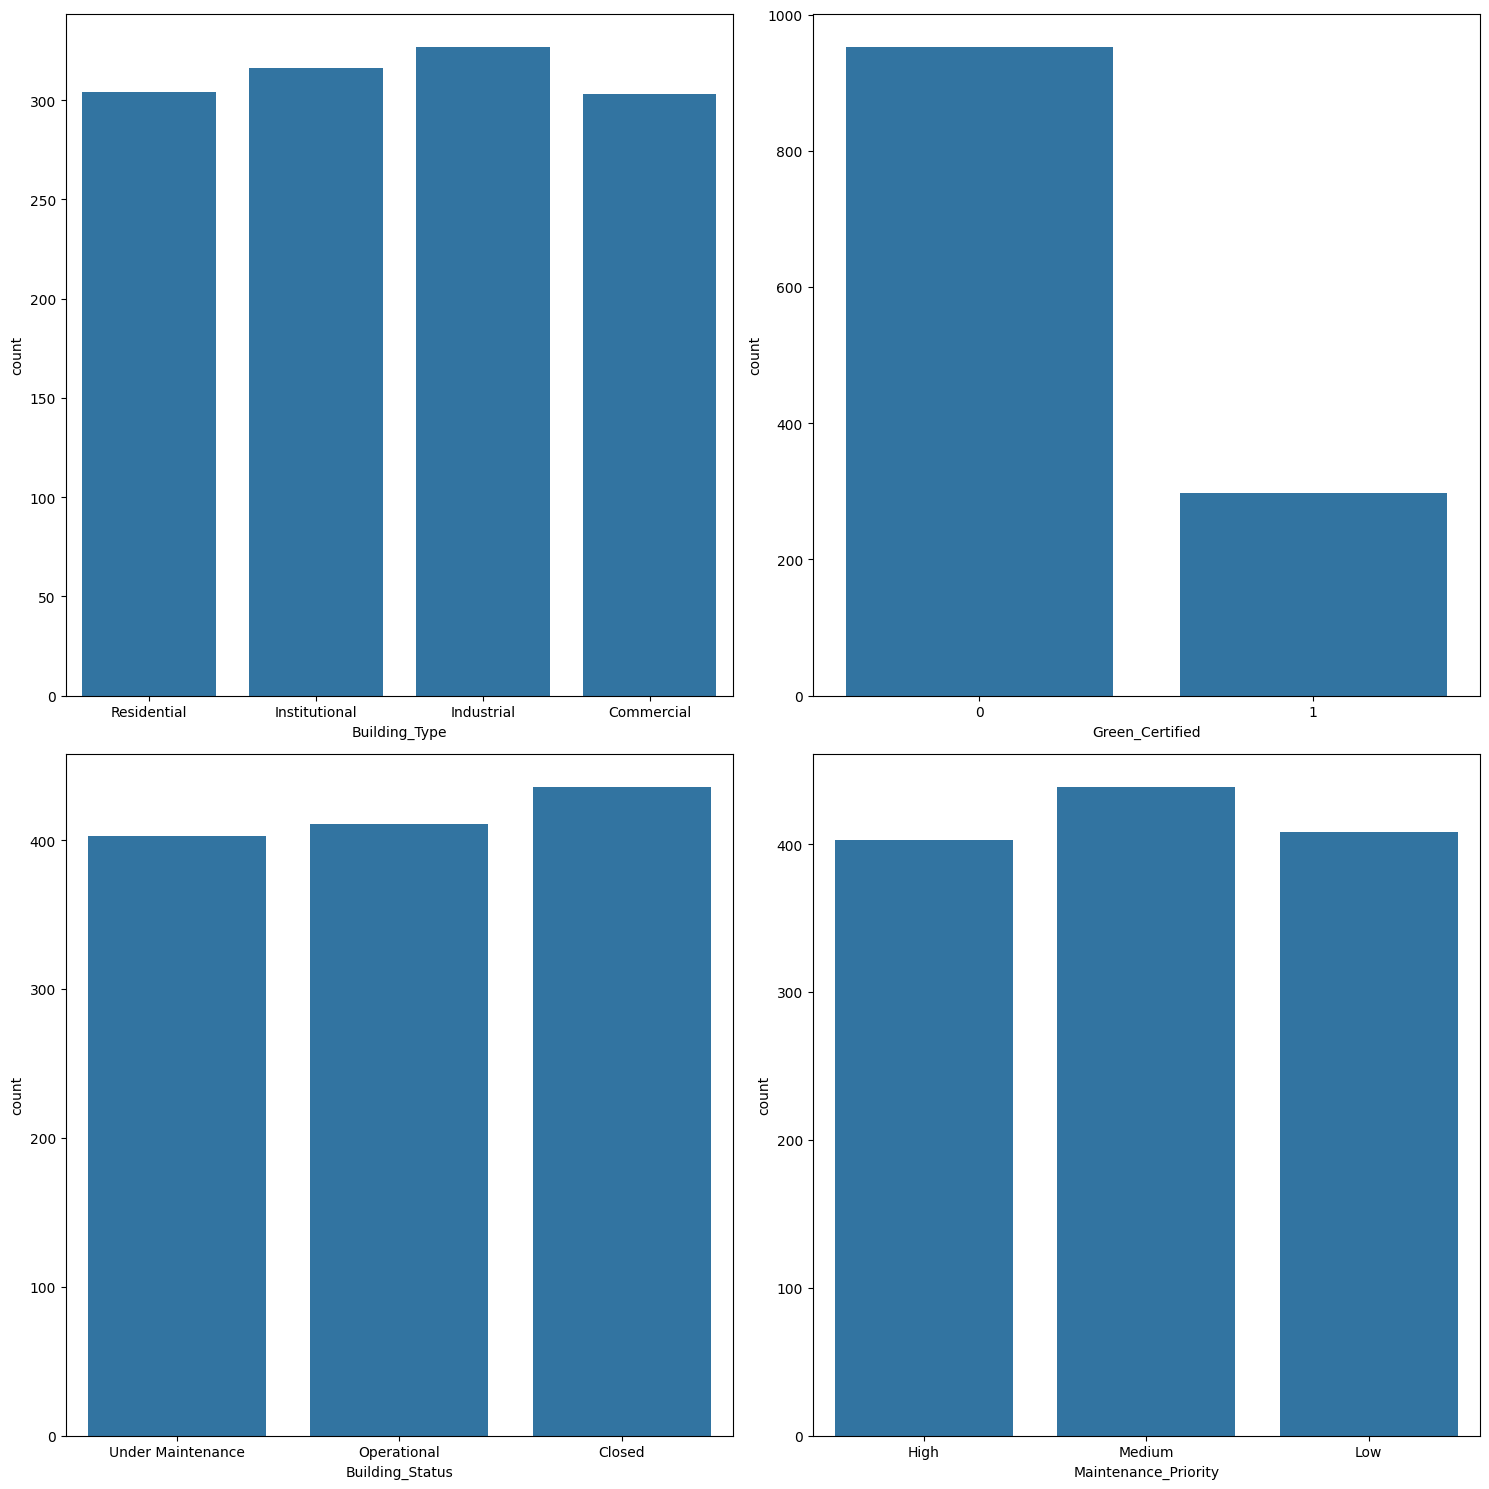

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(x='Building_Type', data=df, ax=axes[0, 0])
sns.countplot(x='Green_Certified', data=df, ax=axes[0, 1])
sns.countplot(x='Building_Status', data=df, ax=axes[1, 0])
sns.countplot(x='Maintenance_Priority', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

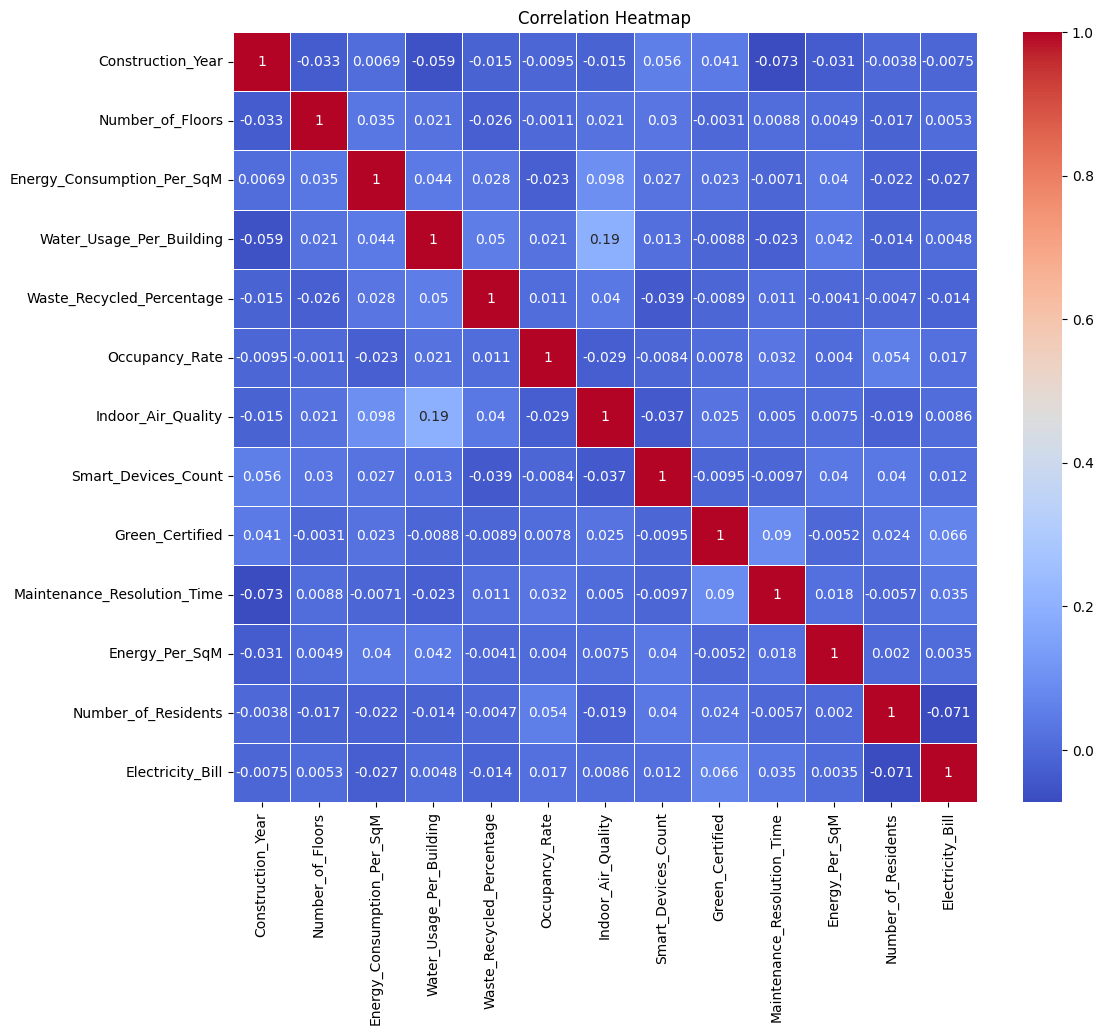

In [160]:
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insights about the data
- 

# B.

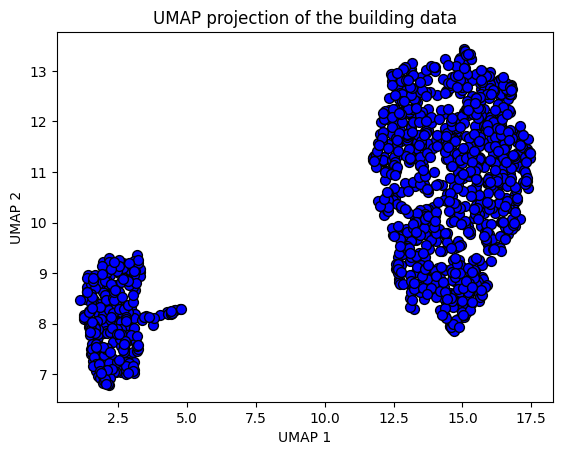

In [161]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
features = df.drop(columns=['Electricity_Bill'])
target = df['Electricity_Bill']

# Select only numeric columns from the features
numeric_features = features.select_dtypes(include=['number'])

# Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply UMAP to reduce dimensions to 2
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(scaled_features)

# Plot the resulting data
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', edgecolor='k', s=50)
plt.title('UMAP projection of the building data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# c)

## preprocessing
Step 1: Preprocessing
Handling Missing Values:

For categorical columns, we fill missing values with the mode (most frequent value).
For numerical columns, we fill missing values with the median.
Encoding Categorical Features:

We use LabelEncoder to convert categorical features into numerical values.
Normalizing Numerical Features:

We use StandardScaler to standardize numerical features so that they have a mean of 0 and a standard deviation of 1.
Splitting the Data:

We split the data into training and testing sets using train_test_split.

In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with the full data
data = df.copy()

# Separate numeric and categorical columns
numeric_df = data.select_dtypes(include=['number'])
cat_df = data.select_dtypes(include=['object'])

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (Categorical: mode, Numeric: median)
data[cat_df.columns] = data[cat_df.columns].fillna(data[cat_df.columns].mode().iloc[0])
data[numeric_df.columns] = data[numeric_df.columns].fillna(data[numeric_df.columns].median())

# Initialize the label encoder
le = LabelEncoder()

# Encode the categorical columns
for column in cat_df.columns:
    data[column] = le.fit_transform(data[column])

# Normalize numerical features (exclude target variable)
scaler = StandardScaler()
numeric_df_features = numeric_df.drop(columns='Electricity_Bill')
data[numeric_df_features.columns] = scaler.fit_transform(data[numeric_df_features.columns])

# Separate features and target variable
X = data.drop(columns=['Electricity_Bill'])
y = data['Electricity_Bill']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


Missing values in each column:
 Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


## Step 2 : Training

Initializing and Fitting the Model:

We initialize a LinearRegression model and fit it to the training data.
Printing Model Coefficients and Intercept:

We print the coefficients and intercept of the fitted model to understand the learned relationships.

In [163]:
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a DataFrame to display the coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Add the intercept as a separate row
intercept = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [model.intercept_]
})

# Append the intercept row to the coefficients DataFrame
coefficients = pd.concat([coefficients, intercept], ignore_index=True)

# Display the coefficients in a table using tabulate
print(tabulate(coefficients, headers='keys', tablefmt='psql', showindex=False))


+-----------------------------+---------------+
| Feature                     |   Coefficient |
|-----------------------------+---------------|
| Building_Type               |     -142.437  |
| Construction_Year           |      -69.9325 |
| Number_of_Floors            |      -78.4657 |
| Energy_Consumption_Per_SqM  |     -207.102  |
| Water_Usage_Per_Building    |      -86.6884 |
| Waste_Recycled_Percentage   |      -39.47   |
| Occupancy_Rate              |      133.806  |
| Indoor_Air_Quality          |      141.579  |
| Smart_Devices_Count         |      202.992  |
| Green_Certified             |      505.735  |
| Maintenance_Resolution_Time |      151.627  |
| Building_Status             |     -193.229  |
| Maintenance_Priority        |      -76.2409 |
| Energy_Per_SqM              |      -97.3799 |
| Number_of_Residents         |     -410.834  |
| Intercept                   |    15652.9    |
+-----------------------------+---------------+


## Step 3: Evaluation
Making Predictions:

We use the fitted model to make predictions on both the training and testing data.
Calculating Evaluation Metrics:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
Root Mean Squared Error (RMSE): The square root of MSE, providing error in the same units as the target variable.
Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
R-squared (R2): Indicates the proportion of variance in the target variable explained by the model.
Adjusted R-squared: Adjusts the R2 score based on the number of predictors, providing a more accurate measure for models with multiple predictors.
Displaying Metrics in a Table:

We use tabulate to print the evaluation metrics in a nicely formatted table.

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from tabulate import tabulate

# Model Evaluation on Training and Test Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics Calculation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R2 Score Calculation
def adjusted_r2(r2, X):
    n = X.shape[0]  # number of samples
    p = X.shape[1]  # number of features
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

adj_r2_train = adjusted_r2(r2_train, X_train)
adj_r2_test = adjusted_r2(r2_test, X_test)

# Preparing data for tabular display
metric_table_c = [
    ["Metric", "Train Set", "Test Set"],
    ["Mean Squared Error (MSE)", mse_train, mse_test],
    ["Root Mean Squared Error (RMSE)", rmse_train, rmse_test],
    ["Mean Absolute Error (MAE)", mae_train, mae_test],
    ["R2 Score", r2_train, r2_test],
    ["Adjusted R2 Score", adj_r2_train, adj_r2_test]
]

# Display the metrics in a table using tabulate
print(tabulate(metric_table_c, headers="firstrow", tablefmt="fancy_grid", floatfmt=".4f"))

def compare_with_c(new_metric_table):
    # Display the metrics in a table using tabulate
    print(tabulate(new_metric_table, headers="firstrow", tablefmt="psql"))


╒════════════════════════════════╤═══════════════╤═══════════════╕
│ Metric                         │     Train Set │      Test Set │
╞════════════════════════════════╪═══════════════╪═══════════════╡
│ Mean Squared Error (MSE)       │ 24730927.6619 │ 23483464.3725 │
├────────────────────────────────┼───────────────┼───────────────┤
│ Root Mean Squared Error (RMSE) │     4973.0200 │     4845.9740 │
├────────────────────────────────┼───────────────┼───────────────┤
│ Mean Absolute Error (MAE)      │     3988.1679 │     3939.1759 │
├────────────────────────────────┼───────────────┼───────────────┤
│ R2 Score                       │        0.0248 │       -0.0657 │
├────────────────────────────────┼───────────────┼───────────────┤
│ Adjusted R2 Score              │        0.0099 │       -0.1340 │
╘════════════════════════════════╧═══════════════╧═══════════════╛


# d)

Feature Selection using RFE
Initialize and Fit RFE with a LinearRegression Model to Select the Top 3 Features
Print the Selected Features

In [165]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Initialize and fit RFE to select the top 3 features
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Select the top 3 features
selected_features = X_train.columns[rfe.support_]
print('Selected Features:', selected_features)

Selected Features: Index(['Energy_Consumption_Per_SqM', 'Green_Certified', 'Number_of_Residents'], dtype='object')


Training with Selected Features
Train the LinearRegression Model Using the Selected Features
Print the Model Coefficients and Intercept in a Table Format Using Tabulate

In [166]:
import pandas as pd
from tabulate import tabulate

# Train the model using the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
model.fit(X_train_rfe, y_train)

# Print the coefficients and intercept
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
intercept = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [model.intercept_]
})
coefficients = pd.concat([coefficients, intercept], ignore_index=True)
print(tabulate(coefficients, headers='keys', tablefmt='psql', showindex=False))

+----------------------------+---------------+
| Feature                    |   Coefficient |
|----------------------------+---------------|
| Energy_Consumption_Per_SqM |      -204.359 |
| Green_Certified            |       510.687 |
| Number_of_Residents        |      -404.341 |
| Intercept                  |     15177.2   |
+----------------------------+---------------+


Evaluation
Make Predictions on Both Training and Testing Data
Calculate and Print Evaluation Metrics (MSE, RMSE, MAE, R2, Adjusted R2) in a Table Format Using Tabulate

In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on training and testing data
y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_rfe.shape[1] - 1)

# Calculate evaluation metrics for testing data
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_rfe.shape[1] - 1)

# Create a DataFrame to display the metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Adjusted R-squared'],
    'Train': [mse_train, rmse_train, mae_train, r2_train, adj_r2_train],
    'Test': [mse, rmse, mae, r2, adj_r2]
})


# Print the metrics in a table format
print(tabulate(evaluation_metrics, headers='keys', tablefmt='psql', showindex=False, stralign='center', colalign=('center', 'center', 'center')))

+-------------------------+-------------+-------------+
|         Metric          |    Train    |    Test     |
|-------------------------+-------------+-------------|
|   Mean Squared Error    | 2.49062e+07 | 2.29001e+07 |
| Root Mean Squared Error |   4990.61   |   4785.41   |
|   Mean Absolute Error   |   4008.64   |   3919.1    |
|        R-squared        |  0.0178516  | -0.0392578  |
|   Adjusted R-squared    |  0.0148933  | -0.0519317  |
+-------------------------+-------------+-------------+


# e)

In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Assuming df is your original DataFrame

# Step 1: One-Hot Encoding for Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop one level to avoid multicollinearity
encoded_cat_df = pd.DataFrame(encoder.fit_transform(df[categorical_features]))

# Add column names for encoded features
encoded_cat_df.columns = encoder.get_feature_names_out(categorical_features)

# Drop original categorical columns and concatenate the encoded features
df_encoded = df.drop(columns=categorical_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_cat_df], axis=1)

# Step 2: Preprocessing Numerical Features (Normalization)
scaler = StandardScaler()
numeric_features = df_encoded.drop(columns=['Electricity_Bill']).select_dtypes(include=[np.number]).columns
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Step 3: Split data into features and target variable
X = df_encoded.drop(columns=['Electricity_Bill'])
y = df_encoded['Electricity_Bill']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Step 4: Ridge Regression
ridge_model = Ridge(alpha=10)  # You can adjust the alpha value for regularization strength
ridge_model.fit(X_train, y_train)

# Step 5: Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Step 6: Evaluation Metrics
# Training Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Testing Metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Step 7: Display the metrics using Tabulate
ridge_evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Adjusted R-squared'],
    'Train': [mse_train, rmse_train, mae_train, r2_train, adj_r2_train],
    'Test': [mse_test, rmse_test, mae_test, r2_test, adj_r2_test]
})

# Print the metrics in a table format
print(tabulate(ridge_evaluation_metrics, headers='keys', tablefmt='psql', showindex=False, stralign='center', colalign=('center', 'center', 'center')))


+-------------------------+-------------+-------------+
|         Metric          |    Train    |    Test     |
|-------------------------+-------------+-------------|
|   Mean Squared Error    | 2.47549e+07 | 2.17193e+07 |
| Root Mean Squared Error |   4975.43   |   4660.4    |
|   Mean Absolute Error   |   3975.41   |   3811.05   |
|        R-squared        |  0.0260932  |  0.0103171  |
|   Adjusted R-squared    | 0.00721135  | -0.0714393  |
+-------------------------+-------------+-------------+


# f)

In [169]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import FastICA
from tabulate import tabulate

def perform_ica_and_ridge(n_components):
    ica = FastICA(n_components=n_components, random_state=62)
    
    # Apply ICA to the training and test data
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)
    
    # Train Ridge regression model
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_ica, y_train)
    
    # Predict on training and test data
    y_train_pred = ridge_model.predict(X_train_ica)
    y_test_pred = ridge_model.predict(X_test_ica)
    
    # Calculate metrics for training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - n_components - 1)
    
    # Calculate metrics for test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - n_components - 1)
    
    # Return the metrics as a dictionary
    return {
        'n_components': n_components,
        'MSE (Train)': mse_train,
        'RMSE (Train)': rmse_train,
        'MAE (Train)': mae_train,
        'R2 (Train)': r2_train,
        'Adjusted R2 (Train)': adj_r2_train,
        'MSE (Test)': mse_test,
        'RMSE (Test)': rmse_test,
        'MAE (Test)': mae_test,
        'R2 (Test)': r2_test,
        'Adjusted R2 (Test)': adj_r2_test
    }


In [170]:
# Step 4: Try different numbers of ICA components
component_list = [4, 5, 6, 8]
results = []

# Perform ICA and Ridge for each component value
for n_components in component_list:
    result = perform_ica_and_ridge(n_components)
    results.append(result)
    # Print the results for each component value in tabulate format columns will be metric name, train, test
    print("ISA with {} components:".format(n_components))
    print(tabulate(result.items(), headers=['Metric', 'Value'], tablefmt='psql', stralign='center', colalign=('center', 'center')))


# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print the comparison of metrics for different ICA components
print(tabulate(results_df, headers='keys', tablefmt='psql', showindex=False, stralign='center', colalign=('center', 'center', 'center')))

ISA with 4 components:
+---------------------+-------------+
|       Metric        |    Value    |
|---------------------+-------------|
|    n_components     |      4      |
|     MSE (Train)     | 2.52237e+07 |
|    RMSE (Train)     |   5022.32   |
|     MAE (Train)     |   3992.41   |
|     R2 (Train)      | 0.00765176  |
| Adjusted R2 (Train) | 0.00366242  |
|     MSE (Test)      | 2.17705e+07 |
|     RMSE (Test)     |   4665.89   |
|     MAE (Test)      |   3779.17   |
|      R2 (Test)      | 0.00798605  |
| Adjusted R2 (Test)  | -0.00821009 |
+---------------------+-------------+
ISA with 5 components:
+---------------------+-------------+
|       Metric        |    Value    |
|---------------------+-------------|
|    n_components     |      5      |
|     MSE (Train)     | 2.5222e+07  |
|    RMSE (Train)     |   5022.15   |
|     MAE (Train)     |   3991.58   |
|     R2 (Train)      |  0.0077169  |
| Adjusted R2 (Train) | 0.00272554  |
|     MSE (Test)      | 2.17635e+07 |
|   

# g)

In [171]:
 print(X_train) # , X_test # Using preprocessed data from part c)

     Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
523          -1.194068         -0.561620                    0.411602   
449           1.673958         -0.296505                   -0.814197   
248           0.909151         -0.561620                    1.937368   
39            0.080611         -1.622080                   -0.814197   
466           1.419023         -0.826735                   -0.814197   
..                 ...               ...                         ...   
418           0.463014          0.763956                   -0.346789   
473           0.526748         -1.622080                    0.798087   
49            0.972885         -0.296505                   -0.814197   
278           1.036619         -0.031390                   -0.248843   
432          -1.512737         -0.296505                   -0.506264   

     Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
523                  1.758716                  -0.019472   

In [172]:
print(y_train) #, y_test

523    22537.837270
449    15079.574820
248     9532.206572
39     14223.292230
466    12689.024080
           ...     
418    12468.071930
473    10757.228700
49     14802.380770
278    14333.512170
432    15548.767010
Name: Electricity_Bill, Length: 1000, dtype: float64


In [173]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Assuming X_train, X_test, y_train, y_test are already defined from the preprocessed data in part (c)

# List of alpha values to test
alpha_values = [0.001,0.01, 0.1, 1, 10,100]

# Function to train ElasticNet and evaluate
def train_and_evaluate_elasticnet(alpha):
    # Initialize ElasticNet model
    model = ElasticNet(alpha=alpha, random_state=32)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    return {
        'Alpha': alpha,
        'MeanSquaredError (MSE)': mse,
        'RootMeanSquaredError (RMSE)': rmse,
        'MeanAbsoluteError (MAE)': mae,
        'R-squared (R2)': r2,
        'AdjustedR-squared (Adj R2)': adj_r2
    }

# Store results
results = []

# Train and evaluate for each alpha value
for alpha in alpha_values:
    result = train_and_evaluate_elasticnet(alpha)
    results.append(result)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print the comparison of metrics for different alpha values
print(tabulate(results_df, headers='keys', tablefmt='psql', showindex=False, stralign='center', colalign=('center', 'center', 'center', 'center', 'center', 'center')))


+---------+--------------------------+-------------------------------+---------------------------+------------------+------------------------------+
|  Alpha  |  MeanSquaredError (MSE)  |  RootMeanSquaredError (RMSE)  |  MeanAbsoluteError (MAE)  |  R-squared (R2)  |  AdjustedR-squared (Adj R2)  |
|---------+--------------------------+-------------------------------+---------------------------+------------------+------------------------------|
|  0.001  |       2.17259e+07        |            4661.11            |          3811.72          |    0.0100159     |          -0.0717654          |
|  0.01   |       2.17227e+07        |            4660.77            |          3811.4           |     0.010162     |          -0.0716073          |
|   0.1   |       2.16954e+07        |            4657.84            |          3808.51          |    0.0114056     |          -0.0702609          |
|    1    |       2.16215e+07        |            4649.89            |          3797.12          |    0.01

# h)

In [174]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Assuming X_train, X_test, y_train, y_test are already defined from the preprocessed data in part (c)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=13)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Create a DataFrame to display the metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared', 'Adjusted R-squared'],
    'Value': [mse, rmse, mae, r2, adj_r2]
})

# Print the metrics in a table format
print(tabulate(evaluation_metrics, headers='keys', tablefmt='psql', showindex=False, stralign='center', colalign=('center', 'center')))


+--------------------------------+-------------+
|             Metric             |    Value    |
|--------------------------------+-------------|
|    Mean Squared Error (MSE)    | 2.45261e+07 |
| Root Mean Squared Error (RMSE) |   4952.38   |
|   Mean Absolute Error (MAE)    |    4092     |
|           R-squared            |  -0.117578  |
|       Adjusted R-squared       |   -0.2099   |
+--------------------------------+-------------+
